# Final Project

In [1]:
# 移除不必要的警告
import warnings
warnings.filterwarnings('ignore')

### 獲取歷史資料

In [2]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())
print(tf.config.experimental.set_visible_devices)
print('GPU:', tf.config.list_physical_devices('GPU'))
print('CPU:', tf.config.list_physical_devices(device_type='CPU'))
print(tf.config.list_physical_devices('GPU'))
print(tf.test.is_gpu_available()) # 输出可用的GPU数量
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU'))) # 查询GPU设备

2.10.1
/device:GPU:0
<function set_visible_devices at 0x000001A2F11DD550>
GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
Num GPUs Available:  1


In [3]:
from finlab.data import Data
#from finlab.ml import fundamental_features
#fdf = fundamental_features()

data = Data()

close = data.get("收盤價")
open_ = data.get("開盤價")
high = data.get("最高價")
low = data.get("最低價")
vol = data.get("成交股數")

PB = data.get("股價淨值比")
pe = data.get("本益比")

#bi = data.get("營業利益")


#close = data.get_adj("收盤價").round(2)

#財務指標
rev = data.get("當月營收")
l_rev = data.get("去年當月營收")

#t123 = data.get('土地')

bargin_i=data.get("投信買賣超股數")/data.get("成交股數")
bargin_f=data.get("外資自營商買賣超股數")/data.get("成交股數")
bargin_s=data.get("自營商買賣超股數(自行買賣)")/data.get("成交股數")
#

vol=data.get('成交股數')/1000
vol_ma5=vol.rolling(5).mean()

rev.index = rev.index.shift(5, "d")         #每月頻率
#周頻率

### 計算features

In [4]:
#MFI  = data.talib("MFI")
##MFI.tail()
#ub,mb,lb =data.talib("BBANDS")

#### 營收相關

In [5]:
##############################################　　　自己加入的　　　##############################################
import pandas as pd
from finlab.__init__ import talib_all_stock
from talib import abstract

In [6]:
def bias(n):
    return close / close.rolling(n, min_periods=1).mean()

def acc(n):
    return close.shift(n) / (close.shift(2*n) + close) * 2

def rsv(n):
    l = close.rolling(n, min_periods=1).min() 
    h = close.rolling(n, min_periods=1).max()
    
    return (close - l) / (h - l)

def mom(n):
    return (rev / rev.shift(1)).shift(n)

#def yoy(n):
#    return (rev.shift(n) / rev.shift(12+n)) -
def yoy(n):
    denominator = rev.shift(12 + n)
    result = rev.shift(n) / denominator - 1
    result[denominator < 0] = 0  # 如果分母为负，将对应的结果设置为0
    return result


def bi(n):
    return bargin_i/bargin_i.rolling(n).mean()

def bf(n):
    return bargin_f/bargin_f.rolling(n).mean()
    
def bs(n):
    return bargin_s/bargin_s.rolling(n).mean()

#-------------------------------------------

features = {
    'mom1': mom(1),
    'mom2': mom(2),
    'mom3': mom(3),
    'mom4': mom(4),
    'mom5': mom(5),
    'mom6': mom(6),
    'mom7': mom(7),
    'mom8': mom(8),
    'mom9': mom(9),

    
    'bias5': bias(5),
    'bias10': bias(10),
    'bias20': bias(20),
    'bias60': bias(60),
    'bias120': bias(120),
    'bias240': bias(240),
    
    'acc5': acc(5),
    'acc10': acc(10),
    'acc20': acc(20),
    'acc60': acc(60),
    'acc120': acc(120),
    'acc240': acc(240),
    
    'rsv5': rsv(5),
    'rsv10': rsv(10),
    'rsv20': rsv(20),
    'rsv60': rsv(60),
    'rsv120': rsv(120),
    'rsv240': rsv(240),
###############################################
    'yoy': yoy(1),
    'delta_yoy':yoy(1)-yoy(2),
    
    'PB':PB,
    'PE':pe,
    
    #'v/ma':vol/vol_ma5,
   #'bi5' : bi(5),
   #'bi10' : bi(10),
   #'bi20' : bi(20),
   #'bi60' : bi(60),
   # 
   #'bf5' : bf(5),
   # #'bf10' : bf(10),
   # #'bf20' : bf(20),
   # #'bf60' : bf(60),
   # 
   # 'bs5' : bs(5),
   # 'bs10' : bs(10),
   # 'bs20' : bs(20),
   # 'bs60' : bs(60),
    
}


In [7]:
yoy(1)

stock_id,1101,1102,1103,1104,1107,1108,1109,1110,1201,1203,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2005-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-15,-0.008009,-0.075633,0.121301,0.066769,NaN,0.431791,-0.143446,0.234091,-0.024680,0.384607,...,-0.037130,0.413395,-0.057254,-0.179187,1.294386,0.322786,-0.276645,0.101934,0.063968,-0.084119
2023-02-15,0.162910,-0.113063,0.333061,0.272864,NaN,0.309856,-0.336393,-0.092717,-0.099534,0.200326,...,-0.138579,0.619756,-0.773686,-0.041727,1.189093,0.225264,-0.463853,0.165291,-0.309252,0.568746
2023-03-15,-0.025629,-0.351210,0.209836,-0.148473,NaN,-0.091673,-0.474314,-0.173711,-0.050133,-0.085944,...,-0.347208,-0.330394,-0.703003,-0.215372,0.128140,-0.142444,-0.464537,-0.120989,-0.058771,0.330021


In [8]:
##def yoy(n):
##    if rev.shift(n) < 0:
##        return rev.shift(n)
##    else :
##        return (rev.shift(n) / rev.shift(12+n)) -1
##
##yoy(1)

In [9]:
#bi(60).dropna(how='all')

#### 財報指標

兩個feature結合[[連結網址]](https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/5d18b63eac23d80020ae4ce7)

---
```python
from finlab import ml
from finlab.data import Data

data = Data()
rsi = data.talib("RSI")

dataset = ml.fundamental_features()
ml.add_feature(dataset, 'RSI', rsi)
```

In [10]:
from finlab.ml import fundamental_features
dataset_fundamental = fundamental_features()

In [11]:
#dataset_fundamental

#### 技術指標

加入其他features
* http://finlabcourse.imotor.com/viewthread.php?tid=660&extra=page%3D1

```python
from finlab import ml
from finlab.data import Data

data = Data()
rsi = data.talib("RSI")

dataset = ml.fundamental_features()
ml.add_feature(dataset, 'RSI', rsi)
```

#### 組合dataset

In [12]:
import pandas as pd

#### 確認各指標清單

In [13]:
#t1 = data.talib("NATR",timeperiod=14)
#t1.to_csv('myfile.csv')

### 製作dataset

##### 設定買賣頻率

In [14]:
#rev.index = rev.index.tz_localize("Asia/Taipei")
every_month = rev.index
every_month

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2022-08-15', '2022-09-15', '2022-10-15', '2022-11-15',
               '2022-12-15', '2023-01-15', '2023-02-15', '2023-03-15',
               '2023-04-15', '2023-05-15'],
              dtype='datetime64[ns]', name='date', length=220, freq=None)

#### 將dataframe 組裝起來

In [15]:
# features['bias20'].reindex(every_month, method='ffill')

for name, f in features.items():
    features[name] = f.reindex(every_month, method='ffill')

In [16]:
for name, f in features.items():
    features[name] = f.unstack()

In [17]:
import pandas as pd
dataset = pd.DataFrame(features)

In [18]:
feature_names = list(dataset.columns)

##### 裝自己要的

In [19]:
from finlab import ml

In [20]:
股本 = data.get('股本合計').reindex(close.index, method='ffill')
市值 = 股本 * close / 10 * 1000
#t1['2330'].dropna()
ml.add_feature(dataset, '市值', 市值)

In [21]:
ml.add_feature(dataset, 'vol_ma5', vol_ma5)

dataset

mom1      mom2      mom3      mom4      mom5  \
stock_id date                                                           
0015     2005-02-15       NaN       NaN       NaN       NaN       NaN   
         2005-03-15       NaN       NaN       NaN       NaN       NaN   
         2005-04-15       NaN       NaN       NaN       NaN       NaN   
         2005-05-15       NaN       NaN       NaN       NaN       NaN   
         2005-06-15       NaN       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
9962     2023-01-15  1.004024  1.163303  0.830797  1.280940  0.641536   
         2023-02-15  1.249495  1.004024  1.163303  0.830797  1.280940   
         2023-03-15  0.729045  1.249495  1.004024  1.163303  0.830797   
         2023-04-15  1.110722  0.729045  1.249495  1.004024  1.163303   
         2023-05-15  1.020832  1.110722  0.729045  1.249495  1.004024   

                         mom6      mom7      mom8      mom9     bias5  ...  \
stock_id date                                                          ...   
0015     2005-02-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-03-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-04-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-05-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-06-15       NaN       NaN       NaN       NaN       NaN  ...   
...                       ...       ...       ...       ...       ...  ...   
9962     2023-01-15  1.694666  0.917472  0.678559  1.435387  1.004331  ...   
         2023-02-15  0.641536  1.694666  0.917472  0.678559  1.005587  ...   
         2023-03-15  1.280940  0.641536  1.694666  0.917472  1.002268  ...   
         2023-04-15  0.830797  1.280940  0.641536  1.694666  0.950579  ...   
         2023-05-15  1.163303  0.830797  1.280940  0.641536  0.989011  ...   

                        rsv20     rsv60    rsv120    rsv240       yoy  \
stock_id date                                                           
0015     2005-02-15       NaN       NaN       NaN       NaN       NaN   
         2005-03-15       NaN       NaN       NaN       NaN       NaN   
         2005-04-15       NaN       NaN       NaN       NaN       NaN   
         2005-05-15       NaN       NaN       NaN       NaN       NaN   
         2005-06-15       NaN       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
9962     2023-01-15  0.895833  0.943820  0.957627  0.586667 -0.084119   
         2023-02-15  1.000000  1.000000  1.000000  0.697778  0.568746   
         2023-03-15  0.920000  0.968750  0.978723  0.902222  0.330021   
         2023-04-15  0.297872  0.702703  0.836634  0.850679  0.221827   
         2023-05-15  0.297872  0.179487  0.549296  0.710407 -0.131049   

                     delta_yoy    PB    PE            市值    vol_ma5  
stock_id date                                                        
0015     2005-02-15        NaN   NaN   NaN           NaN        NaN  
         2005-03-15        NaN   NaN   NaN           NaN        NaN  
         2005-04-15        NaN   NaN   NaN           NaN        NaN  
         2005-05-15        NaN   NaN   NaN           NaN        NaN  
         2005-06-15        NaN   NaN   NaN           NaN        NaN  
...                        ...   ...   ...           ...        ...  
9962     2023-01-15  -0.214041  1.46  7.70  1.673587e+09  3007.9848  
         2023-02-15   0.652864  1.55  8.22  1.786362e+09   932.8926  
         2023-03-15  -0.238725  1.73  9.17  1.993869e+09   831.0838  
         2023-04-15  -0.108194  1.60  9.05  1.926203e+09  4249.7718  
         2023-05-15  -0.352876  1.66  8.23  1.786362e+09   862.8846  

[453200 rows x 33 columns]

In [22]:
##############################################　　　自己加入的　　　##############################################
dataset.index = dataset.index.set_names(['stock_id','date'], level=[0,1])


#dataset.index.levels[1].name = 'date'
#dataset.index.levels[0].name = 'stock_id'

#因為你pandas更新到新版了
## profit.index.levels[0].name = 'year'
## profit.index.levels[1].name = 'month'
#這兩行的語法被棄用，請改成
#profit.index=profit.index.set_names('year', level=0)
#profit.index=profit.index.set_names('month', level=1)
#or profit.index=profit.index.set_names(['year','month'], level=[0,1])
#直接一行
#就可以了

In [23]:
#list(dataset_fundamental.index)

In [24]:
#dataset_fundamental.reindex(dataset.index).dropna()

data[組合](https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/5d18b63eac23d80020ae4ce7)
```python
new_df = pd.concat([dataset_fundamental['R406_經常利益成長率'],dataset],axis=1).dropna(how='any')
```

In [25]:
new_df = pd.concat([dataset_fundamental,dataset],axis=1).dropna(how='any')
dataset1 = new_df.fillna(method='ffill')#[(new_df.index.get_level_values('stock_id')=='2330')]
#dataset = dataset1

In [26]:
#feature_names=list(dataset1.columns)
#feature_names

### 先把我想要的dataset值先調整一下

In [27]:
# 篩選掉 vol < 2000 的資料
dataset = dataset[dataset['vol_ma5'] >= 200]

### 新增 label(績效/排名)
 - 定義一下要比績效還是要比排名

In [28]:
from finlab import ml

ml.add_profit_prediction(dataset)
ml.add_rank_prediction(dataset)

In [29]:
#profit(return) rank
predi_target = 'rank'

### 刪除太大太小的歷史資料

In [30]:
print(dataset.shape)

def drop_extreme_case(dataset, feature_names, thresh=0.01):
    
    extreme_cases = pd.Series(False, index=dataset.index)
    for f in feature_names:
        tf = dataset[f]
        extreme_cases = extreme_cases | (tf < tf.quantile(thresh)) | (tf > tf.quantile(1-thresh))
    dataset = dataset[~extreme_cases]
    return dataset

dataset_drop_extreme_case = drop_extreme_case(dataset , feature_names , thresh=0.01)

print(dataset_drop_extreme_case.shape)

##(436774, 25)
##(388157, 25)

(183404, 35)
(146179, 35)


In [31]:
dataset_dropna = dataset_drop_extreme_case.dropna(how='any')
dataset_dropna = dataset_dropna.reset_index().set_index("date")

In [32]:
#dataset_drop_extreme_case.index.get_level_values("date")

In [33]:
##################################################################################################################
##############################################　　　自己加入的　　　##############################################
##################################################################################################################

dataset_dropna.index = pd.to_datetime(dataset_dropna.index)
dataset_dropna = dataset_dropna.sort_index()

#修復＜class ‘numpy.ndarray‘＞　https://blog.csdn.net/lxbin/article/details/114005757

## Split Train Test dataset

In [34]:
# 計算要分割的索引位置
split_index = int(len(dataset_dropna) * 0.85)

# 分割資料集
dataset_train = dataset_dropna.iloc[:split_index]
dataset_test = dataset_dropna.iloc[split_index:]

dataset_test

,stock_id,mom1,mom2,mom3,mom4,mom5,mom6,mom7,mom8,mom9,...,rsv120,rsv240,yoy,delta_yoy,PB,PE,市值,vol_ma5,return,rank
date,,,,,,,,,,,,,,,,,,,,,
2021-11-15,3376,0.983750,1.115414,1.002589,0.928345,0.823768,1.135000,1.185070,0.623685,0.871816,...,0.000000,0.000000,-0.477065,-0.150567,1.23,13.55,1.872882e+10,734.1384,0.955988,0.184195
2021-11-15,8054,1.066926,1.063900,0.900265,0.860619,0.818094,0.951750,1.189418,0.864479,1.374542,...,0.668831,0.803089,-0.194271,-0.122722,1.95,17.47,4.285482e+09,4996.3404,0.943114,0.133062
2021-11-15,1905,1.002000,0.954584,0.944483,0.980198,0.991281,0.935482,1.270749,0.917813,0.978319,...,0.099548,0.565312,0.105006,-0.059356,1.59,36.61,2.503436e+10,3758.9604,1.037445,0.710633
2021-11-15,3005,0.867304,1.128534,1.057772,0.932738,0.821669,1.067510,1.472124,0.730296,0.981166,...,0.591398,0.379487,-0.037890,-0.223001,1.90,7.53,3.257174e+10,1017.2152,0.992701,0.420686
2021-11-15,1701,1.065835,0.971268,0.933978,0.943657,1.108680,1.040322,1.190191,0.605604,1.172674,...,0.234568,0.234568,-0.130624,-0.111108,0.88,14.55,6.677017e+09,252.1918,1.013363,0.581639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-15,1437,1.004437,0.588899,1.519073,0.926687,0.922556,0.544176,1.992672,1.124977,0.999474,...,0.510345,0.569697,-0.224935,-0.134722,0.79,13.85,5.633385e+09,970.7482,1.110307,0.749573
2023-03-15,8107,0.829899,1.082044,0.928110,0.976331,0.926621,1.573455,0.651271,1.322484,1.079157,...,0.184874,0.227586,0.146184,-0.165717,0.89,38.04,1.312500e+09,218.2314,1.005780,0.208879
2023-03-15,3324,0.807153,0.924509,1.186635,0.975824,0.988565,0.913514,0.942206,1.154845,1.129956,...,0.766355,0.422680,-0.377923,-0.137820,2.44,10.76,1.396627e+10,1047.5574,1.605678,0.990894


In [35]:
#dataset_train = dataset_dropna.loc[:'2022-03']
#dataset_test = dataset_dropna.loc['2022-04':]
#
##date_arr = dataset.index.get_level_values('date') < '2020'
##dataset_train = dataset[date_arr]
##dataset_test = dataset[~date_arr]

In [36]:
train = dataset_train[feature_names] , dataset_train['return'] > 1.01
test = dataset_test[feature_names] , dataset_test['return'] > 1.00

### 機器學習
 - 目前只有三個，技術指標也要再增加一下feature_names

In [37]:
#feature_names = feature_names1

In [38]:
#dataset_train.index

#### keras

In [39]:
import tensorflow as tf

In [40]:
model = tf.keras.Sequential()

In [41]:
#from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras import initializers
#
#import os
#
#
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
#
#model = keras.models.Sequential()
#model.add(tf.keras.layers.Dense(100, activation='relu',
#                      input_shape=(len(feature_names),),
#                      kernel_initializer=initializers.he_normal(seed=0)))
#model.add(tf.keras.layers.Dropout(0.3))
#model.add(tf.keras.layers.Dense(100, activation='relu',
#                      kernel_initializer=initializers.he_normal(seed=0)))
#model.add(tf.keras.layers.Dropout(0.3))
#model.add(tf.keras.layers.Dense(100, activation='relu',
#                      kernel_initializer=initializers.he_normal(seed=0)))
#model.add(tf.keras.layers.Dropout(0.3))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#
#
#model.summary()
#
#model.compile(loss=['mean_squared_error','sparse_categorical_crossentropy'],
#              optimizer="adam",
#              metrics=['accuracy']
#             )
#
#print('start fitting')
#history = model.fit(dataset_train[feature_names], dataset_train[predi_target],
#                    batch_size=888,         #1000  #每一个batch的大小
#                    epochs=400, #225          #迭代次数
#                    verbose=1,
#                    validation_split=0.1,
#                    #validation_data =        #(测试集的输入特征，测试集的标签），
#                    #validation_split =       # 从测试集中划分多少比例给训练集，
#                    #validation_freq = 20        #测试的epoch间隔数                     
#                   )

In [42]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras.callbacks import EarlyStopping

import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

model = keras.models.Sequential()
model.add(layers.BatchNormalization(input_shape=(len(feature_names),)))
model.add(layers.Dense(200, activation='relu',
                      kernel_initializer=initializers.he_normal(seed=0),
                      kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(150, activation='relu',
                      kernel_initializer=initializers.he_normal(seed=0),
                      kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, activation='relu',
                      kernel_initializer=initializers.he_normal(seed=0),
                      kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

history = model.fit(dataset_train[feature_names], dataset_train[predi_target],
                    batch_size=888,
                    epochs=400,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[es])


Epoch 1/400
63/63 [==============================] - 3s 12ms/step - loss: 7.7560 - accuracy: 5.4458e-05 - val_loss: 5.6912 - val_accuracy: 1.6337e-04
Epoch 2/400
63/63 [==============================] - 0s 7ms/step - loss: 4.4577 - accuracy: 5.4458e-05 - val_loss: 3.4013 - val_accuracy: 4.9012e-04
Epoch 3/400
63/63 [==============================] - 0s 7ms/step - loss: 2.7696 - accuracy: 7.2611e-05 - val_loss: 2.2282 - val_accuracy: 4.9012e-04
Epoch 4/400
63/63 [==============================] - 0s 7ms/step - loss: 1.8928 - accuracy: 9.0764e-05 - val_loss: 1.6013 - val_accuracy: 4.9012e-04
Epoch 5/400
63/63 [==============================] - 0s 6ms/step - loss: 1.4129 - accuracy: 7.2611e-05 - val_loss: 1.2466 - val_accuracy: 4.9012e-04
Epoch 6/400
63/63 [==============================] - 0s 6ms/step - loss: 1.1351 - accuracy: 1.2707e-04 - val_loss: 1.0353 - val_accuracy: 4.9012e-04
Epoch 7/400
63/63 [==============================] - 0s 6ms/step - loss: 0.9669 - accuracy: 1.2707e-04 - 

##### 結果

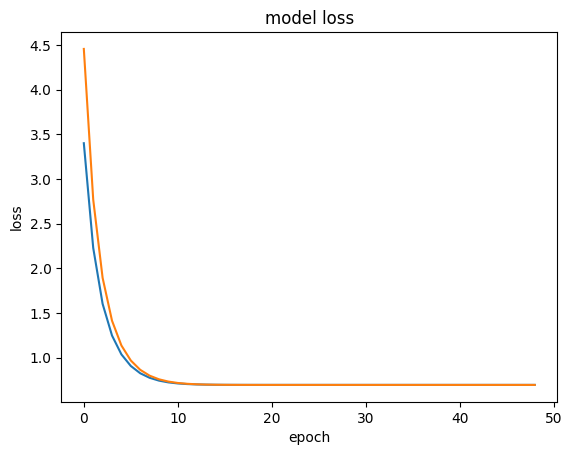

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history.history['val_loss'][1:])
plt.plot(history.history['loss'][1:])

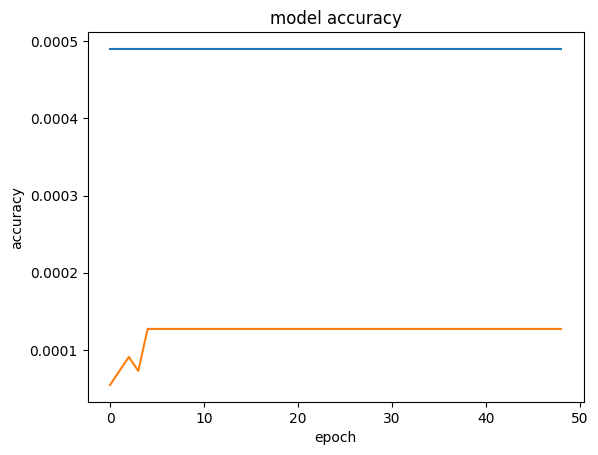

In [44]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['val_accuracy'][1:])
plt.plot(history.history['accuracy'][1:])

#### lightgbm Model

In [45]:
##############################################　　　自己加入的　　　##############################################
import lightgbm as lgb

cf = lgb.LGBMRegressor(n_estimators=5000)

print('---cf.fit---')
print(cf.fit(*train))
print('---cf.score---')
print(cf.score(*test))
print('---predict---')
print(cf.predict(test[0]))

---cf.fit---
LGBMRegressor(n_estimators=5000)
---cf.score---
-0.13495252730433127
---predict---
[0.38587138 0.3299092  0.47164677 ... 0.20078075 0.49367065 0.2211738 ]


##### 參數優化_1110

In [46]:
#import lightgbm

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [test],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMRegressor(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000) #LGBMClassifier
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

gs.fit(*train, **fit_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[55]	valid's auc: 0.524726
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.520097
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[16]	valid's auc: 0.543995
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.525312
Early stopping, best iteration is:
[78]	valid's auc: 0.528909
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.521822
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[16]	valid's auc: 0.542909
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[47]	valid's auc: 0.513132
Training until validation scores don't improve for

RandomizedSearchCV(cv=3,
                   estimator=LGBMRegressor(metric='None', n_estimators=5000,
                                           n_jobs=4, random_state=314),
                   n_iter=100,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001A3B2688C40>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A3B27B0EE0>,
                                        'min_chi...01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A491AE6760>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10,
        

In [47]:
#gs.fit(*train, **fit_params)

In [48]:
print(gs.best_score_)
gs.best_estimator_

0.5603193928323754


LGBMRegressor(colsample_bytree=0.5645098230355559, metric='None',
              min_child_samples=250, min_child_weight=100.0, n_estimators=5000,
              n_jobs=4, num_leaves=12, random_state=314, reg_alpha=0,
              reg_lambda=100, subsample=0.8265673984661308)

In [49]:
#
#gs.best_estimator_
#LGBMClassifier(colsample_bytree=0.6433117836032942, metric='None',
#               min_child_samples=224, min_child_weight=1e-05, n_estimators=5000,
#               n_jobs=4, num_leaves=20, random_state=314, reg_alpha=10,
#               reg_lambda=10, subsample=0.8945613420997809)

In [50]:
##cf = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
##               colsample_bytree=0.4467801334566121, importance_type='split',
##               learning_rate=0.1, max_depth=-1, metric='None',
##               min_child_samples=107, min_child_weight=1, min_split_gain=0.0,
##               n_estimators=5000, n_jobs=4, num_leaves=43, objective=None,
##               random_state=314, reg_alpha=10, reg_lambda=100, silent=True,
##               subsample=0.40294551048668437, subsample_for_bin=200000,
##               subsample_freq=0)
##
##
##cf.fit(dataset_train[feature_names],dataset_train['return'] > 1.05, **fit_params)
##cf.score(dataset_test[feature_names],dataset_test['return'] > 1.05)
##下面那行調整中

In [51]:
##原本的上面那行
cf = lgb.LGBMRegressor(colsample_bytree=0.46057355201144884, metric='None',
              min_child_samples=292, min_child_weight=100.0, n_estimators=5000,
              n_jobs=4, num_leaves=19, random_state=314, reg_alpha=0.1,
              reg_lambda=0.1, subsample=0.6639817938702197)

cf.fit(dataset_train[feature_names],dataset_train['return'] > 1.0, **fit_params)
cf.score(dataset_test[feature_names],dataset_test['return'] > 1.0)

#-0.005192009257166452
#-0.0024771482763943364

Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.526784
Early stopping, best iteration is:
[127]	valid's auc: 0.53


-0.021867416299553133

In [52]:
cf.feature_importances_

array([101,  85,  74,  84,  98,  67,  89,  72,  98, 105,  60,  90,  85,
        94,  55,  61,  92,  79,  98,  77,  62,  46,  53,  61,  46,  39,
        66,  56,  61,  61,  71])

<Axes: xlabel='Value', ylabel='Feature'>

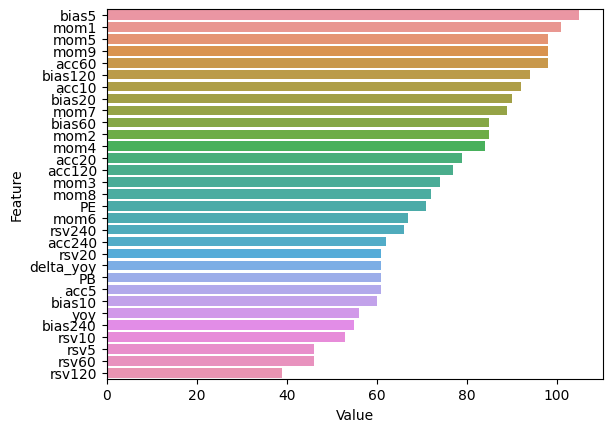

In [53]:
feature_imp = pd.DataFrame(zip(cf.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

In [54]:
#print(cf.fit(*train))

In [55]:
#import lightgbm as lgb
#gbm = lgb.LGBMClassifier(n_estimators=100, random_state=5, learning_rate=0.01)
#gbm.fit(dataset_train[feature_names], dataset_train['return'] > 1)

In [56]:
#import tqdm
#
#n = 3
#
#X = []
#y = []
#indexes = []
#dataset_scaled_x = dataset_scaled[feature_names]
#
#for i in tqdm.tqdm_notebook(range(0, len(dataset_scaled)-n)):
#    X.append(dataset_scaled_x.iloc[i:i+n].values)
#    y.append(dataset_scaled['return'].iloc[i+n-1])
#    indexes.append(dataset_scaled.index[i+n-1])
##dataset_scaled.head()

In [57]:
#import numpy as np
#X = np.array(X)
#y = np.array(y)

In [58]:
##import lightgbm as lgb
#cf = lgb.LGBMRegressor(colsample_bytree=0.7740467183023685, metric='None',
#               min_child_samples=395, min_child_weight=0.01, n_estimators=5000,
#               n_jobs=4, num_leaves=9, random_state=314, reg_alpha=5,
#               reg_lambda=10, subsample=0.4643892520208455)
#    
#cf.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

#### Random Forest Model

In [59]:
from sklearn.ensemble import RandomForestRegressor

cf2 = RandomForestRegressor(n_estimators=100)
cf2.fit(dataset_train[feature_names].astype(float), dataset_train[predi_target])  

RandomForestRegressor()

##### 參數優化_1110

In [60]:
#from scipy.stats import randint as sp_randint 
#from sklearn.model_selection import RandomizedSearchCV 
## build a classifier 
#cf2 = RandomForestRegressor(n_estimators=100) 
## specify parameters and distributions to sample from 
#param_dist = {"max_depth": [3, None], 
#              "max_features": sp_randint(1, 11), 
#              "min_samples_split": sp_randint(2, 11), 
#              "min_samples_leaf": sp_randint(1, 11), 
#              "bootstrap": [True, False], 
#              "criterion": ["mse", "mae"]} 
## run randomized search 
#n_iter_search = 20 
#rs = RandomizedSearchCV(cf2, param_distributions=param_dist, 
#                                   n_iter=n_iter_search) 

In [61]:
#rs.fit(dataset_train[features], dataset_train['return'] >1)

##### Split Train Test dataset

<Axes: xlabel='Value', ylabel='Feature'>

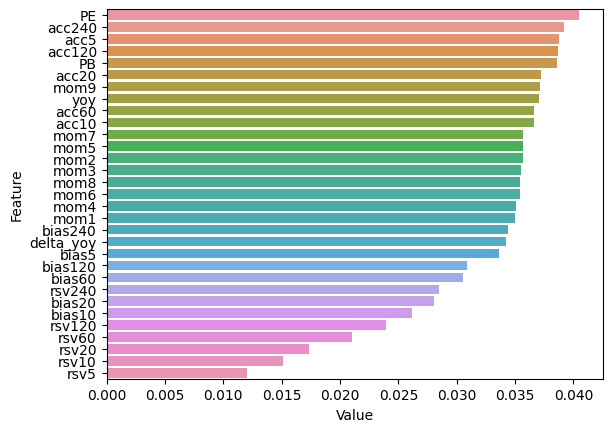

In [62]:
feature_imp = pd.DataFrame(zip(cf2.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

In [63]:
select = dataset.index.get_level_values('date') < '2022-08'
dataset_train = dataset[select]
dataset_test = dataset[~select]

### Ensemble learning

In [64]:
dataset_drop = dataset.dropna(subset=feature_names+['return'])

vals = model.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result1'] = pd.Series(vals.swapaxes(0,1)[0], dataset_drop.index)

vals = cf.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result2'] = pd.Series(vals, dataset_drop.index)

vals = cf2.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result3'] = pd.Series(vals, dataset_drop.index)

dataset_drop = dataset_drop.reset_index().set_index("date")

3504/3504 [==============================] - 6s 2ms/step


## backtest

## 把量加進來做篩選
 * https://hahow.in/courses/5b9d3a6dca498a001e917383/shapeussions/60c96f5b018697e8a6131cbc

In [65]:
#把量加進來
vol=data.get('成交股數')/1000
vol_ma5=vol.rolling(5).mean()

vol_filter=vol_ma5>1000
vol_filter=vol_filter[vol_filter].fillna(0)
#vol_filter
t1 = vol_filter

In [66]:
#condition2

In [67]:
vol_filter = t1.reindex(every_month, method='ffill')#.loc['2010-02-15']
#vol_filter.loc['2010-02-15']

In [68]:
#t1 = vol_ma5.iloc[-1].dropna()
#t1.to_csv('./tmp/132.csv')
#t1.hist(bins=10)

In [69]:
#市值
#t1 = (predi_target >= predi_target.nlargest(20).iloc[-1]) * condition_Filter_v2.astype(float)()

100%|████████████████████████████████████████████████████████████████████████████████| 159/159 [00:07<00:00, 20.02it/s]


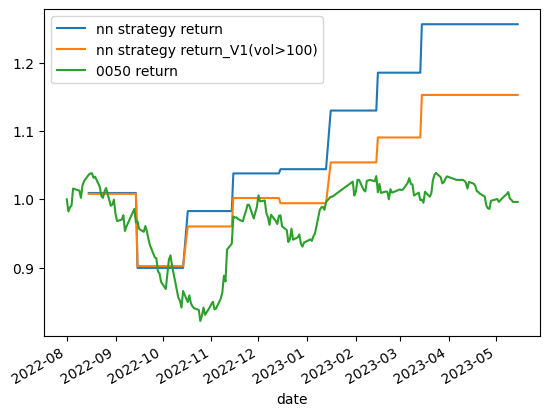

In [70]:
import math
from tqdm import tqdm

vol = 1000
test_period = '2022-08'

dates = sorted(list(set(dataset_drop.index)))

rs = []
rs_v1 = []
rs_v2 = []
rs_v3 = []

for d in tqdm(dates):
    #print(d)
    dataset_time = dataset_drop.loc[d]
    
    dataset_time = drop_extreme_case(dataset_time , feature_names , thresh=0.01)
    
    #print(dataset_time)
    
    predi_target = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
    
    #predi_target = predi_target * (dataset_time['vol_ma5'] >vol).astype(float)
            ###

    
    condition1 = dataset_time['vol_ma5'] > vol
    condition_Filter_v1 = condition1
    predi_target_v1 = predi_target * condition_Filter_v1.astype(float)
    
    condition2 = (1e9 < dataset_time['市值']) < 1e10
    
    condition_Filter_v2 =  condition1 + condition2
    predi_target_v2 = predi_target * condition_Filter_v2.astype(float)
    
    condition_P = (predi_target >= predi_target.nlargest(20).iloc[-1])
    condition_v1 = (predi_target_v1 >= predi_target_v1.nlargest(20).iloc[-1])
    condition_v2 = (predi_target_v2 >= predi_target_v2.nlargest(20).iloc[-1])
    
    predi_target = predi_target * (dataset_time['vol_ma5'] >vol).astype(float)
    condition_v3 = (predi_target >= predi_target.nlargest(20).iloc[-1]) & condition_Filter_v2 #.astype(float)
    
    #print(vol_filter.loc[d])
    #print(condition)
    
    r = dataset_time['return'][condition_P].mean()
    rs.append(r * (1-3/1000-1.425/1000*2*0.6))
    
    r_v1 = dataset_time['return'][condition_v1].mean()
    rs_v1.append(r_v1 * (1-3/1000-1.425/1000*2*0.6))    
    
    r_v2 = dataset_time['return'][condition_v2].mean()
    rs_v2.append(r_v2 * (1-3/1000-1.425/1000*2*0.6))    

    r_v3 = dataset_time['return'][condition_v3].mean()
    rs_v3.append(r_v3 * (1-3/1000-1.425/1000*2*0.6))    
        
rs = pd.Series(rs, index=dates)[test_period:].cumprod()
rs_v1 = pd.Series(rs_v1, index=dates)[test_period:].cumprod() #*
rs_v2 = pd.Series(rs_v2, index=dates)[test_period:].cumprod() #*
rs_v3 = pd.Series(rs_v3, index=dates)[test_period:].cumprod() #*

s0050 = close['0050'][test_period:]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'),
              'nn strategy return_V1(vol>100)':rs_v1.reindex(s0050.index, method='ffill'),
              #'nn strategy return_V2(vol+market cap)':rs_v2.reindex(s0050.index, method='ffill'),
              #'nn strategy return_V3(vol+market cap)':rs_v3.reindex(s0050.index, method='ffill'),
              '0050 return':s0050/s0050[0]
             }).plot()



import winsound
frequency = 2000
duration = 100
winsound.Beep(frequency, duration)

In [71]:
#import pickle
#
#return_history_1026 = pd.Series(rs, index=dates)['2021':].cumprod()
##eq = (gain[hold == 1].mean(axis=1)).fillna(1).cumprod()
#
#pickle.dump(rs, open('return_history_1026.pkl', 'wb'))

In [72]:
#import pyfolio as pf
#import pandas as pd
#
#close.index = close.index.tz_localize("Asia/Taipei")
##pf.create_returns_tear_sheet(close['0050'].pct_change())
#
## 得到 上一個單元的 回測結果
#ret = pickle.load(open("return_history_1026.pkl", "rb"))
#
## 將回測報酬率取出來
#ret = ret.pct_change().dropna()
#ret.index = pd.to_datetime(ret.index).tz_localize('Asia/Taipei')
#
## 利用pyfolio 比較報酬率
#pf.create_returns_tear_sheet(ret, benchmark_rets=close['0050'].pct_change())

### 當月持股狀況

23/23 [==============================] - 0s 2ms/step


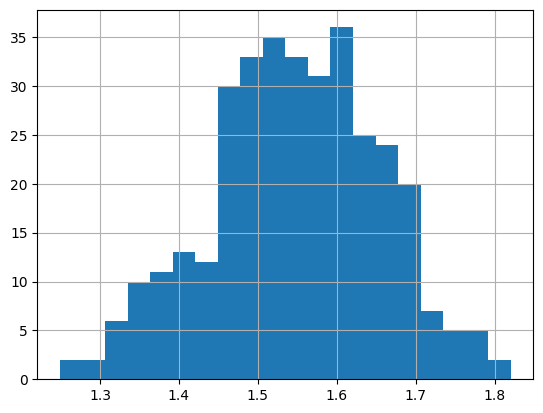

In [73]:
# get the latest dataset
last_date = dataset.index.levels[1].max()#"2022-10-15"
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


last_dataset = drop_extreme_case(last_dataset, feature_names , thresh=0.01)
t1 = last_dataset

# remove NaN testcases
last_dataset = last_dataset.dropna(subset=feature_names)

# predict

vals = model.predict(last_dataset[feature_names].astype(float))
last_dataset['result1'] = pd.Series(vals.swapaxes(0,1)[0], last_dataset.index)

vals = cf.predict(last_dataset[feature_names].astype(float))
last_dataset['result2'] = pd.Series(vals, last_dataset.index)

vals = cf2.predict(last_dataset[feature_names].astype(float))
last_dataset['result3'] = pd.Series(vals, last_dataset.index)


# calculate score

predi_target = last_dataset['result1'] + last_dataset['result2'] + last_dataset['result3']

#
##predi_target = predi_target * vol_filter.iloc[-1] #******加上量的濾網


predi_target = predi_target * (last_dataset['vol_ma5'] >vol).astype(float)  #排除平均成交量小於MA1000張
#predi_target = predi_target * (last_dataset['市值'] < 1e10).astype(float)   #排除市值小於100億以下的股票

condition0 = (predi_target >= predi_target.nlargest(20).iloc[-1])
condition1 = last_dataset['vol_ma5'] >vol
condition2 = last_dataset['市值'] < 1e10

condition = condition0 & condition1 #& condition2

#vol_filter

# plot rank distribution
predi_target[predi_target!=0].hist(bins=20)


# show the best 20 stocks
slist1 = predi_target[condition].reset_index()['stock_id']

#https://keras-cn.readthedocs.io/en/latest/models/model/

In [74]:
last_date = dataset.index.levels[1].max()#"2022-10-15"
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()

In [75]:
#rank.sort_values(ascending=False).head(20)

## 平均分配資產於股票之中

In [76]:
close = data.get("收盤價")

money = 150000
stock_prices = close[slist1].iloc[-1]


print("股票平分張數:")
money / len(stock_prices) / stock_prices / 1000


股票平分張數:


stock_id
1102    0.169492
1104    0.262697
1308    0.294118
1524    0.344037
2354    0.142315
2413    0.226929
2504    0.264550
2515    0.738916
3078    0.142315
3290    0.276753
3322    0.392670
4306    0.455927
4906    0.252101
4977    0.075301
5009    0.138376
6142    0.607287
6248    0.255102
6290    0.129758
8050    0.097529
8091    0.083333
Name: 2023-05-15 00:00:00, dtype: float64

In [77]:
last_dataset['市值'][slist1]

stock_id  date      
1102      2023-05-15    1.569073e+11
1104      2023-05-15    1.866054e+10
1308      2023-05-15    1.514047e+10
1524      2023-05-15    3.603767e+09
2354      2023-05-15    7.454337e+10
2413      2023-05-15    4.209222e+09
2504      2023-05-15    3.345300e+10
2515      2023-05-15    1.553863e+10
3078      2023-05-15    1.198351e+10
3290      2023-05-15    2.697775e+09
3322      2023-05-15    2.052595e+09
4306      2023-05-15    1.050051e+10
4906      2023-05-15    1.205348e+10
4977      2023-05-15    6.841504e+09
5009      2023-05-15    2.475509e+10
6142      2023-05-15    4.085123e+09
6248      2023-05-15    1.784918e+09
6290      2023-05-15    8.540886e+09
8050      2023-05-15    1.361897e+10
8091      2023-05-15    4.100409e+09
Name: 市值, dtype: float64

In [78]:
last_dataset['vol_ma5'][slist1]

stock_id  date      
1102      2023-05-15     2995.3072
1104      2023-05-15     3351.6794
1308      2023-05-15     1321.8780
1524      2023-05-15     1798.3908
2354      2023-05-15     1690.3800
2413      2023-05-15     2621.3498
2504      2023-05-15     4202.9502
2515      2023-05-15     9861.6266
3078      2023-05-15    10269.9402
3290      2023-05-15     2657.9368
3322      2023-05-15     2020.1632
4306      2023-05-15     1842.4606
4906      2023-05-15     3385.5610
4977      2023-05-15     2116.7336
5009      2023-05-15    16637.0490
6142      2023-05-15     2169.1710
6248      2023-05-15     2033.6052
6290      2023-05-15     2119.0830
8050      2023-05-15     2898.0014
8091      2023-05-15     2167.8812
Name: vol_ma5, dtype: float64

###################################################################################################
## 移動窗格最佳化
[有空來試試看連結](https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/61b4c90147843d0006cf2593)
###################################################################################################

In [79]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def select(df):
    rank = df['pre']
    condition1 = (rank >= rank.nlargest(1).iloc[-1])
    return df['return'][condition1].mean() * (1-3/1000-1.425/1000*2*0.6)

end = 5
cf = lgb.LGBMRegressor(n_estimators=500)
train_time = ['2015','2016','2017','2018','2019']
s_time = ['2007','2008','2009','2010','2011']
test_time = ['2016','2017','2018','2019','2020']
store_mse = []

for time in range(end):
    print('%d 次執行中'%(time))
    dataset_dropna2_train = dataset_copy.loc[s_time[time]:train_time[time]] #2007~ 2015   2008~2016   2009~2017  2010~2018  ....
    dataset_dropna2_test = dataset_copy.loc[test_time[time]:test_time[time]]#            2016                2017               2018              2019  .....
    
    cf.fit(dataset_dropna2_train[feature_names].astype(float), dataset_dropna2_train['rank'])
    
    predict = cf.predict(dataset_dropna2_test[feature_names])
    dataset_dropna2_test['pre'] = predict
    dates = dataset_dropna2_test.index.get_level_values('date')
    b = dataset_dropna2_test.groupby(dates).apply(select).cumprod()
    s0050 = close['0050'][test_time[time]:test_time[time]]
    s0056 = close['0056'][test_time[time]:test_time[time]]
    pd.DataFrame({'Best 1 stocks return(include handling fee)':b.reindex(s0050.index, method='ffill'), 
                  '0050':s0050/s0050[0],'0056':s0056/s0056[0]}).plot()
    plt.ylabel('return')


0 次執行中


NameError: name 'dataset_copy' is not defined

In [ ]:
def mystrategy(data):

    close = data.get("收盤價", 120)

    vol = data.get('成交股數', 120)
 

    condition1 = close.max() / close.min()

    rev = data.get("當月營收", 14)

    condition2 = (rev.iloc[-1] / rev.iloc[-13])

    condition3 = (rev.iloc[-2] / rev.iloc[-14])

    稅後淨利 = data.get('本期淨利（淨損）', 5)

    # 股東權益，有兩個名稱，有些公司叫做權益總計，有些叫做權益總額，所以得把它們抓出來

    權益總計 = data.get('權益總計', 5)

    權益總額 = data.get('權益總額', 5)

    # 並且把它們合併起來

    權益總計.fillna(權益總額, inplace=True)

    roe = 稅後淨利 / 權益總計

    condition4 = roe.iloc[-1] / roe.iloc[-5]

    select_stock = (condition1.rank() + # 該數值越小越好

    condition2.rank(ascending=False) + # 該值越大越好 

    condition3.rank(ascending=False) + # 該值越大越好

    condition4.rank(ascending=False) # 該值越大越好 

    ).rank() <= 10
    
    df=select_stock[select_stock]
    vol=vol[df.index].iloc[-1]
    cond_vol=vol>(1000*1000)

    return cond_vol[cond_vol]


In [ ]:
stocks = mystrategy(data)
stocks

In [ ]:
    權益總計 = data.get('權益總計', 5)

    權益總額 = data.get('權益總額', 5)

    # 並且把它們合併起來

    權益總計.fillna(權益總額, inplace=True)

In [ ]:
權益總計

In [ ]:
close = data.get("收盤價", 120)
vol = data.get('成交股數', 120)
condition1 = close.max() / close.min()
rev = data.get("當月營收", 14)
condition2 = (rev.iloc[-1] / rev.iloc[-13])
condition3 = (rev.iloc[-2] / rev.iloc[-14])
稅後淨利 = data.get('本期淨利（淨損）', 5)
# 股東權益，有兩個名稱，有些公司叫做權益總計，有些叫做權益總額，所以得把它們抓出來
權益總計 = data.get('權益總計', 5)
權益總額 = data.get('權益總額', 5)
# 並且把它們合併起來
權益總計.fillna(權益總額, inplace=True)
roe = 稅後淨利 / 權益總計
condition4 = roe.iloc[-1] / roe.iloc[-5]
select_stock = (condition1.rank() + # 該數值越小越好
condition2.rank(ascending=False) + # 該值越大越好 
condition3.rank(ascending=False) + # 該值越大越好
condition4.rank(ascending=False) # 該值越大越好 
).rank() <= 10
df=select_stock[select_stock]
vol=vol[df.index].iloc[-1]
cond_vol=vol>(1000*1000)


In [ ]:
condition4